# AIRBNB DATA ANALYSIS AND PRICE PREDICTION

### Team Members

Berfin Duman - 040190108

Bike Sönmez - 090190326 

### Work Distribution 
Task1 Litearure Review : %50 Bike , %50 Berfin

Task2 Data Analysis and Visualization : %60 Bike,  %40 Berfin

Task3 Preprocessing  : %50 Berfin, %50 Bike

Task4 Modelling(Regression) : %100 Berfin 

Task4 Modelling(Classification) : %50 Berfin,  %50 Bike

Task4 Modelling(Clustering) : %100 Bike


# Importing Dataset and Necessary Libraries

In [6]:
!pip install missingno
!pip install wordcloud
! pip install geopandas
! pip install pysal
! pi install pysal.contrib

     -------------------------------------- 153.3/153.3 kB 1.0 MB/s eta 0:00:00


In [9]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

# Visualization 
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from wordcloud import WordCloud 
import geopandas as gpd
import missingno as msno
from shapely.geometry import Point, Polygon

import pysal as ps
# from pysal.contrib.viz import mapping as maps

In [10]:
import session_info
session_info.show()

## Dataset

New York City Airbnb Open Data is usually a comprehensive dataset that gives insights into the Airbnb activity in New York City. This data can be utilized to gain understanding about the market in the area, such as the distribution of rental prices, the busiest times of the year, and the impact of Airbnb on the local economy.

Features in dataset:

* id: A unique identifier for the Airbnb listing.

* name: The name or title of the listing.

* host_id: A unique identifier for the host of the Airbnb listing.

* host_name: The name of the host.

* neighbourhood_group: The larger group to which the neighbourhood belongs (e.g., Manhattan, Brooklyn, Queens, Staten Island, and The Bronx).

* neighbourhood: The specific neighbourhood where the Airbnb is located.

* latitude and longitude: The geographical coordinates of the Airbnb listing.

* room_type: The type of room that is being offered (e.g., Entire home/apt, Private room, Shared room).

* price: The cost per night for the Airbnb listing in USD.

* minimum_nights: The minimum number of nights that a guest can book the Airbnb listing.

* number_of_reviews: The total number of reviews that the Airbnb listing has received.

* last_review: The date of the last review received for the Airbnb listing.

* reviews_per_month: The average number of reviews the Airbnb listing receives each month.

* calculated_host_listings_count: The number of listings that the host has in total.

* availability_365: The number of days in a year when the Airbnb listing is available for booking.

In [11]:
df = pd.read_csv("../datasets/AB_NYC_2019.csv") 
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [ ]:
df.drop(['id','host_name','last_review'], axis=1, inplace=True)   # We have removed the featurettes that will not be useful in analysis and prediction.
df.head()

name  host_id  \
0                Clean & quiet apt home by the park     2787   
1                             Skylit Midtown Castle     2845   
2               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3                   Cozy Entire Floor of Brownstone     4869   
4  Entire Apt: Spacious Studio/Loft by central park     7192   

  neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   
2           Manhattan        Harlem  40.80902  -73.94190     Private room   
3            Brooklyn  Clinton Hill  40.68514  -73.95976  Entire home/apt   
4           Manhattan   East Harlem  40.79851  -73.94399  Entire home/apt   

   price  minimum_nights  number_of_reviews  reviews_per_month  \
0    149               1                  9               0.21   
1    225               1                 45               0.38   
2    150               3                  0                NaN   
3     89               1                270               4.64   
4     80              10                  9               0.10   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355  
2                               1               365  
3                               1               194  
4                               1                 0

In [ ]:
df.columns # features of data

Index(['name', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [ ]:
df.shape # shape of data

(48895, 13)

In [ ]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  reviews_per_month               38843 non-null  float64
 11  calculated_host_listings_count  48895 non-null  int64  
 12  availability_365                

In [ ]:
df.dtypes.value_counts() 

int64      6
object     4
float64    3
dtype: int64

In [ ]:
df.nunique() # Number of unique values of each feature

name                              47905
host_id                           37457
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [ ]:
df.host_id.nunique() # Return how many different hosts are given dataset

37457

In [ ]:
df.duplicated().sum() # Return if there are any duplicate values / No duplicate value

0

Check for the null values in each column

In [ ]:
df.isnull().sum()  

name                                 16
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Visualization of null values ​​across all data

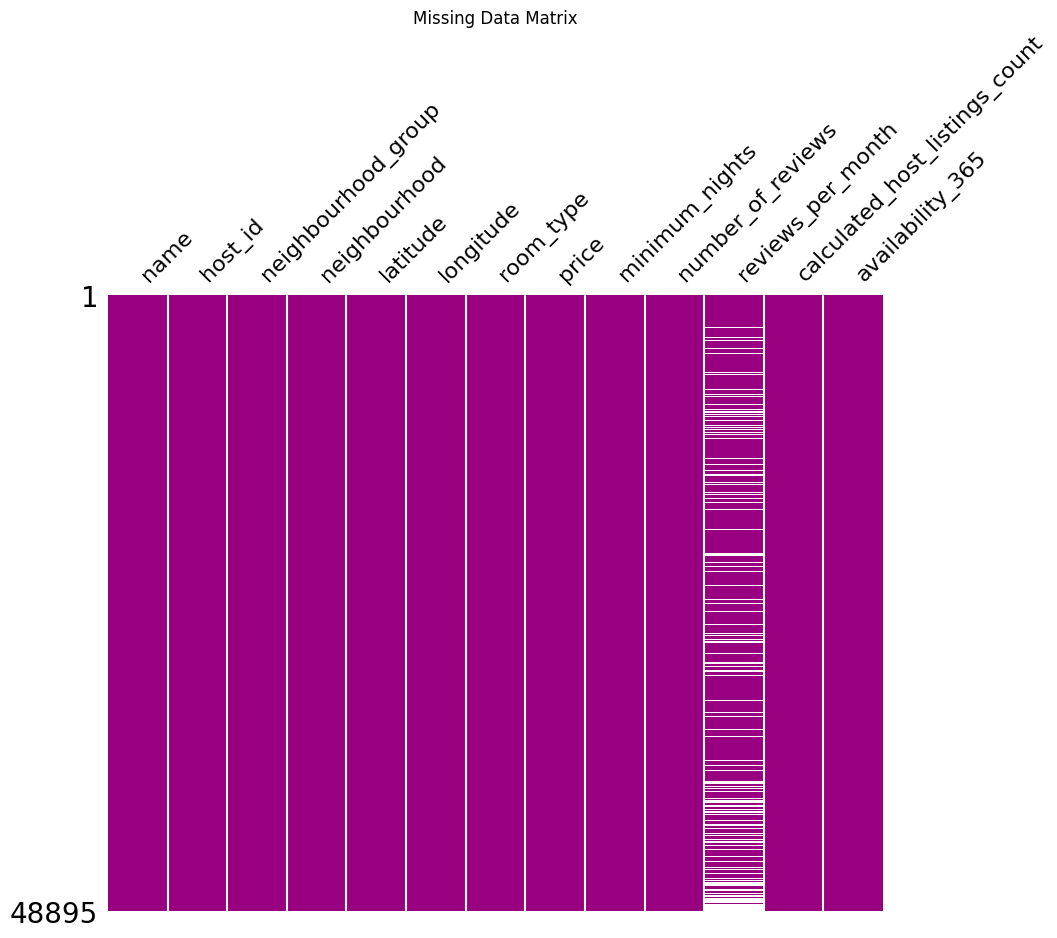

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
msno.matrix(df, color=(0.6, 0.0, 0.5), ax=ax)
plt.title("Missing Data Matrix")
plt.show()

Statistical informations about features 

In [ ]:
df.describe().round(2)

host_id  latitude  longitude     price  minimum_nights  \
count  4.889500e+04  48895.00   48895.00  48895.00        48895.00   
mean   6.762001e+07     40.73     -73.95    152.72            7.03   
std    7.861097e+07      0.05       0.05    240.15           20.51   
min    2.438000e+03     40.50     -74.24      0.00            1.00   
25%    7.822033e+06     40.69     -73.98     69.00            1.00   
50%    3.079382e+07     40.72     -73.96    106.00            3.00   
75%    1.074344e+08     40.76     -73.94    175.00            5.00   
max    2.743213e+08     40.91     -73.71  10000.00         1250.00   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count           48895.00           38843.00                        48895.00   
mean               23.27               1.37                            7.14   
std                44.55               1.68                           32.95   
min                 0.00               0.01                            1.00   
25%                 1.00               0.19                            1.00   
50%                 5.00               0.72                            1.00   
75%                24.00               2.02                            2.00   
max               629.00              58.50                          327.00   

       availability_365  
count          48895.00  
mean             112.78  
std              131.62  
min                0.00  
25%                0.00  
50%               45.00  
75%              227.00  
max              365.00

# Data analysis and Visualization  

Visualizing the distribution for every feature

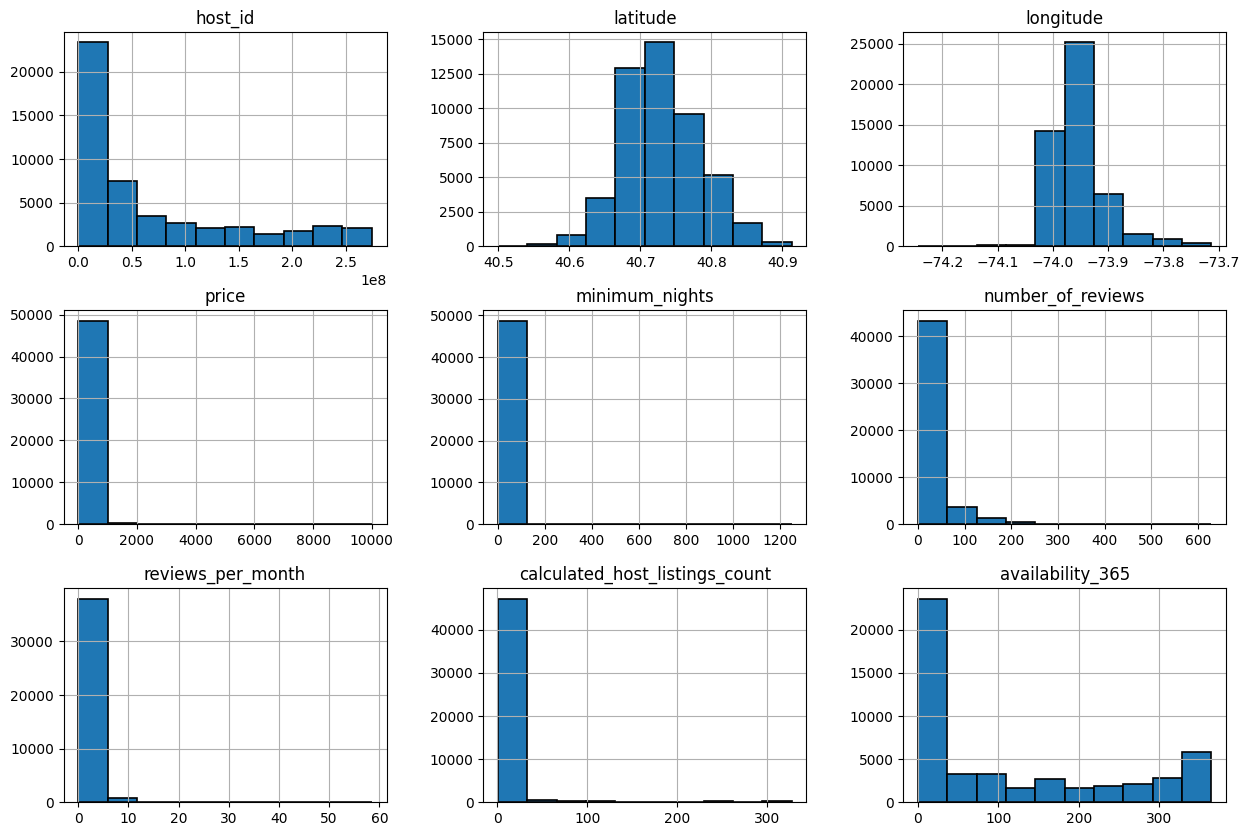

In [ ]:
df.hist(edgecolor="black", linewidth=1.2, figsize=(15, 10))
plt.show()

It can be observed that the distributions of many of the data characteristics are skewed and not uniform.

This situation has forced us to work on the next chapters.

<Figure size 1500x1000 with 0 Axes>

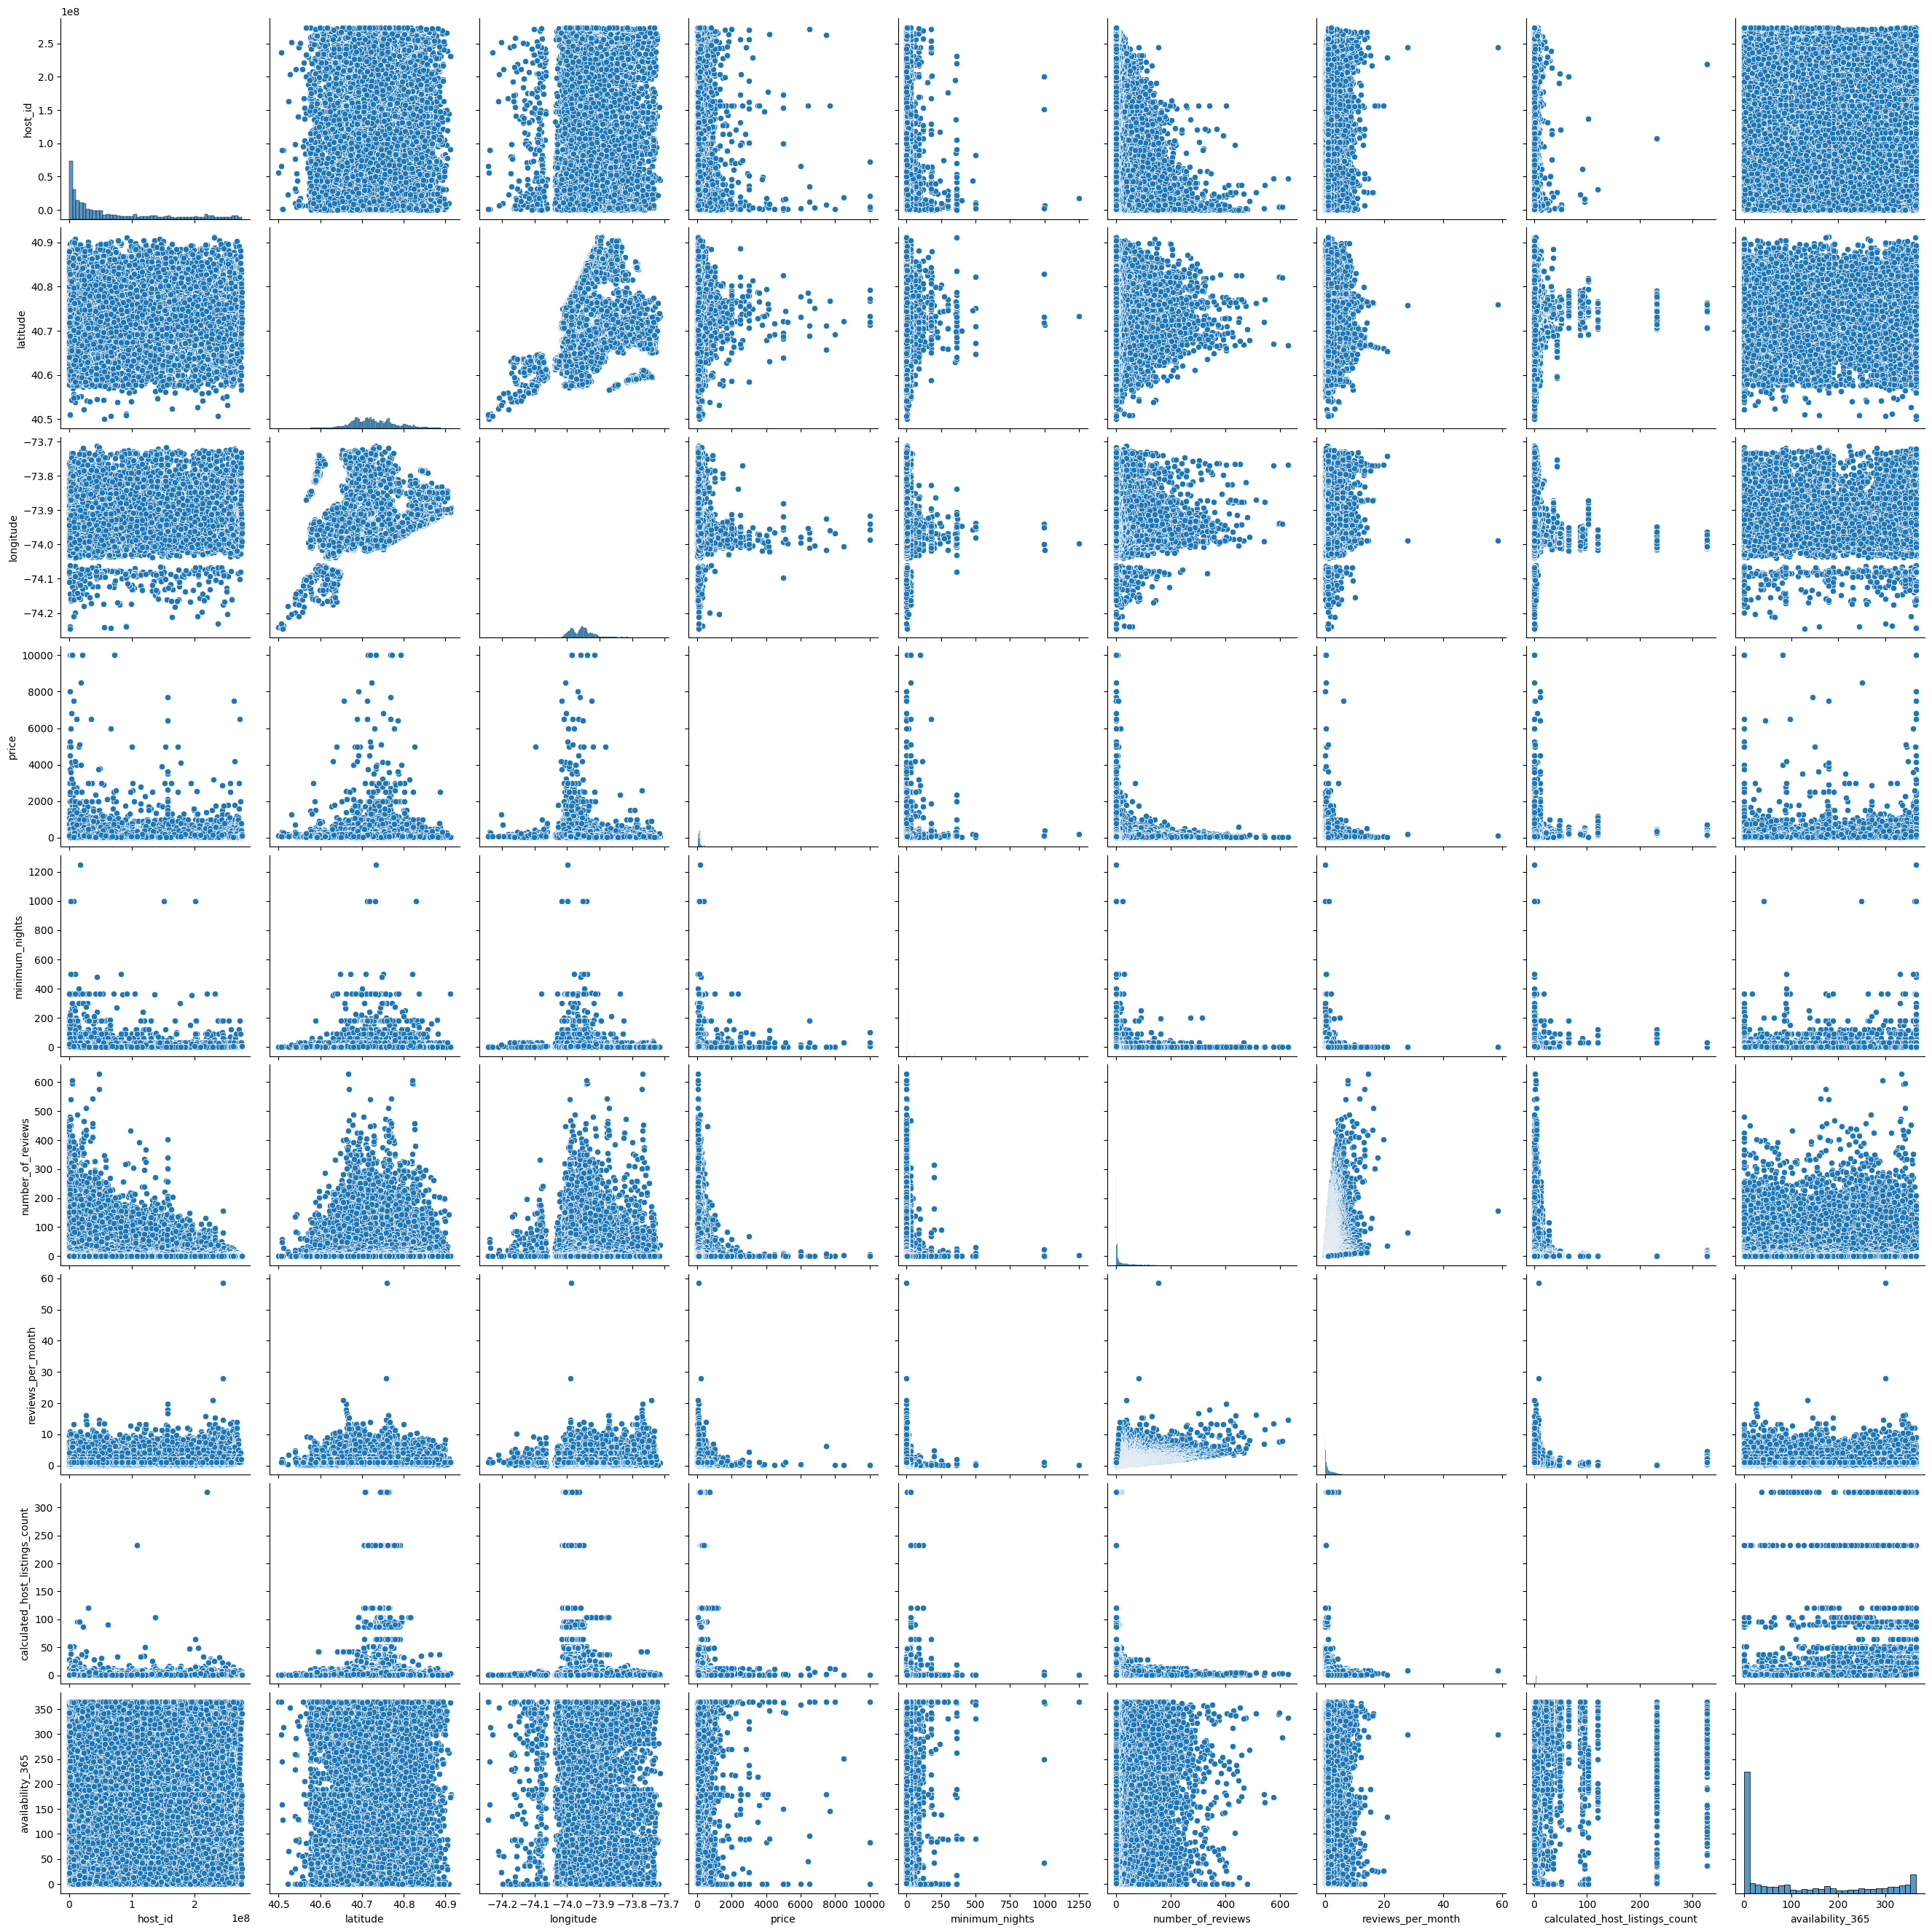

In [ ]:
plt.figure(figsize=(15, 10))
sns.pairplot(df, height=3, diag_kind="hist")
plt.show()

## neighbourhood_group 	

In [ ]:
df.neighbourhood_group.unique() # Return unique neighboorhod categories in the data

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

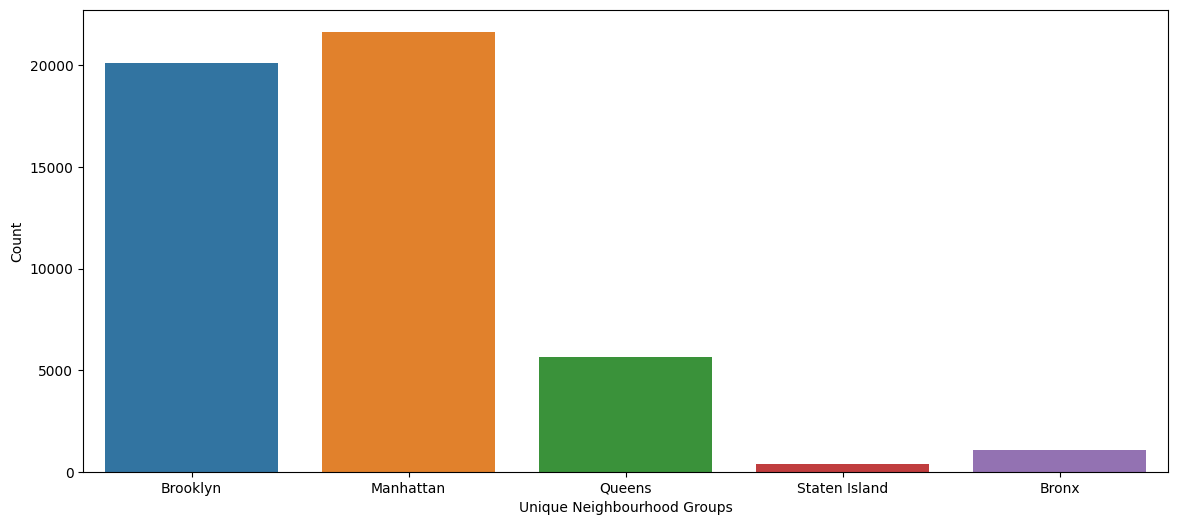

In [ ]:
sns.countplot(data=df, x='neighbourhood_group')
plt.xlabel('Unique Neighbourhood Groups')
plt.ylabel('Count')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.longitude, y=df.latitude, hue=df.neighbourhood_group)
plt.ioff()

Map of neighbourhood_group

#### neighbourhood

In [ ]:
df.neighbourhood.nunique() # Return how many different types of neighbourhood are in the data

221

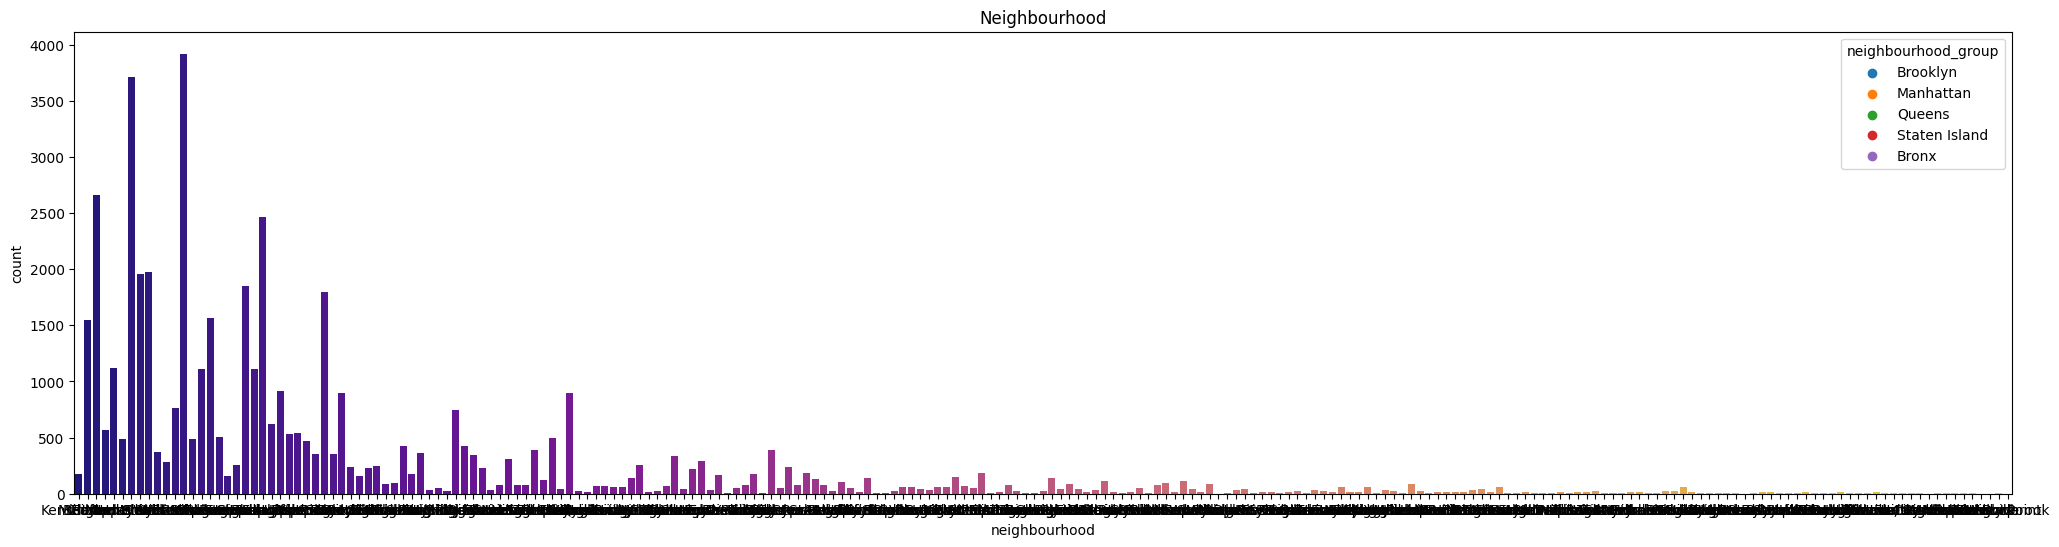

In [ ]:
sns.countplot(data=df, x='neighbourhood', palette="plasma")
fig = plt.gcf()
fig.set_size_inches(25,6)
plt.title('Neighbourhood')
plt.show()

In [ ]:
data = df.neighbourhood.value_counts()[:10]
plt.figure(figsize=(10, 8))
x = list(data.index)
y = list(data.values)
x.reverse()
y.reverse()
plt.title("Most Popular Neighbourhood")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of guest Who host in this Area")
plt.barh(x, y)

<BarContainer object of 10 artists>

#### Latitude- Longitude 	

Creating GeoDataFrame with geo pandas and visualization airbnb points

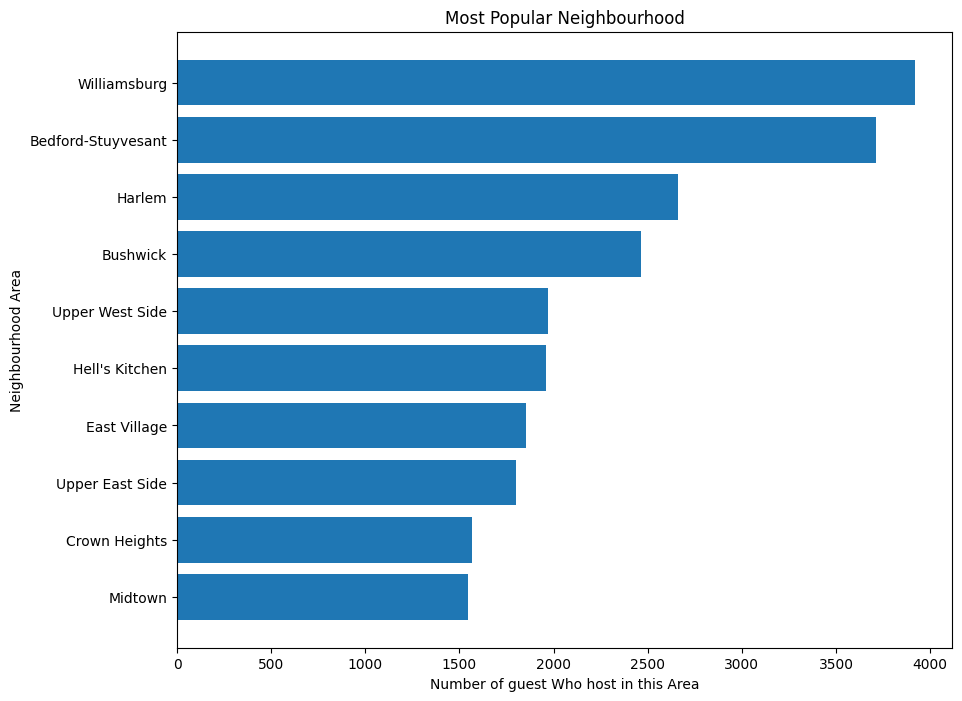

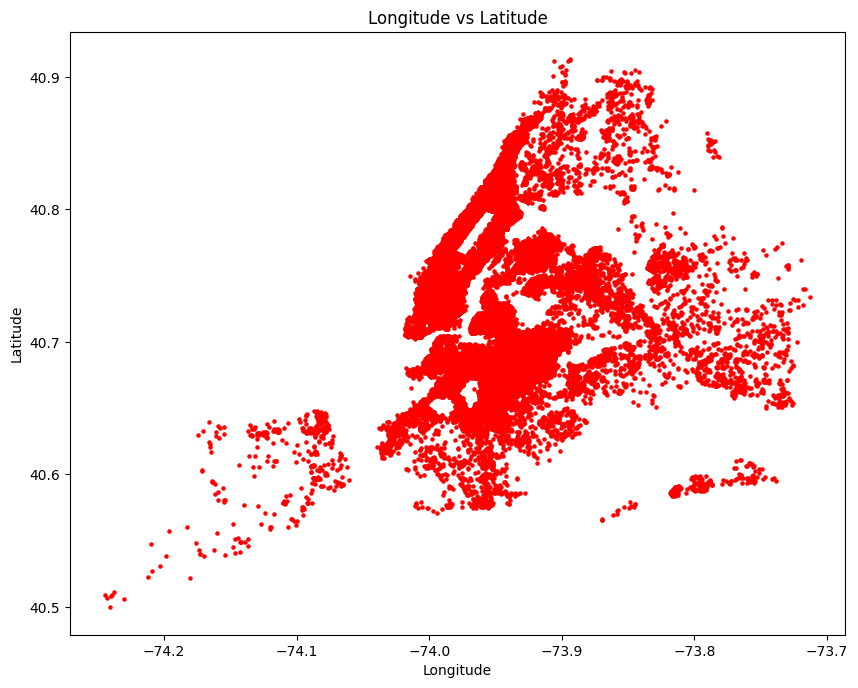

In [ ]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['longitude'], df['latitude']))
gdf.plot(marker='o', color='red', markersize=5, figsize=(10,8))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Longitude vs Latitude')
plt.show()

Observe the location on the map of each airbnb apartment in NewYork

#### Visualisation of airbnb spots on the map according to their prices

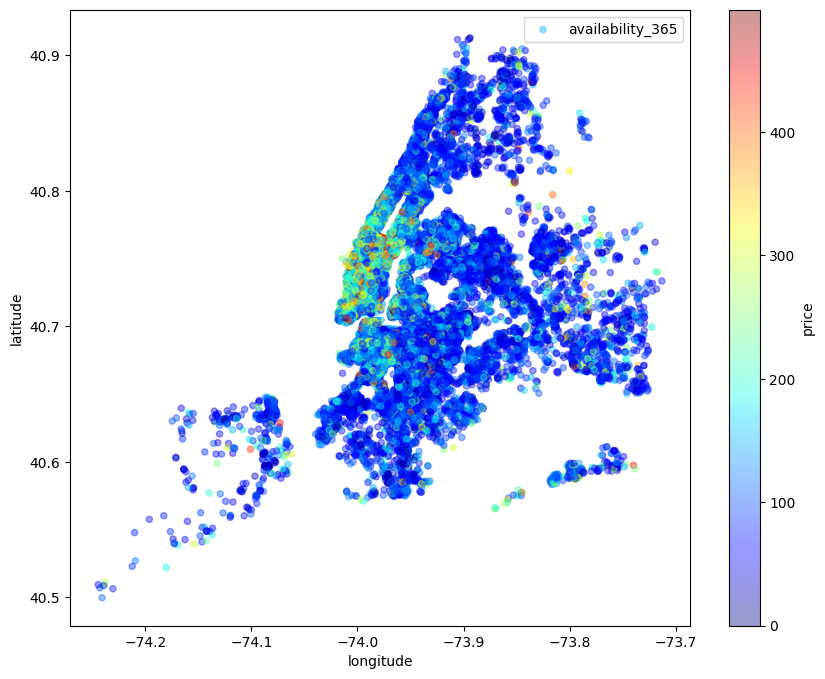

In [ ]:
sub_df=df[df.price < 500] # According to the price distribution, we set the limit of less than 500 for better observation on the map 
map=sub_df.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
map.legend()
plt.show()

It is observed that as the price range in which the houses in the 0-200 band are in the majority increases, the number of houses corresponding to it decreases.

#### Room_type

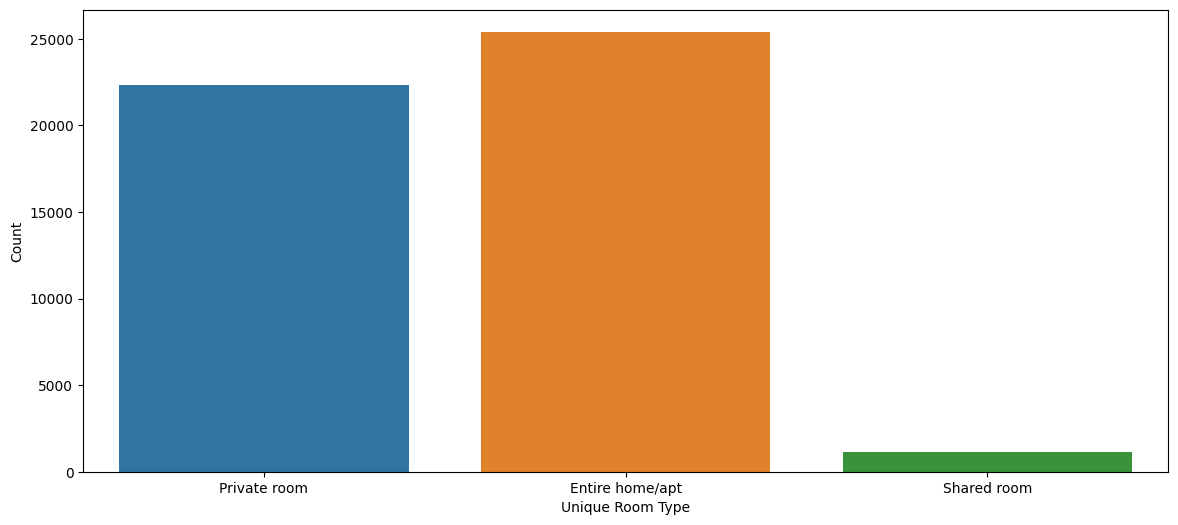

In [ ]:
sns.countplot(data=df, x='room_type')
plt.xlabel('Unique Room Type')
plt.ylabel('Count')
plt.show()

We see that there are 3 different types of room types as privite room, entire home and shared rrom. The most observed room type in the data is the room of the entire hoom type.

#### Price 	

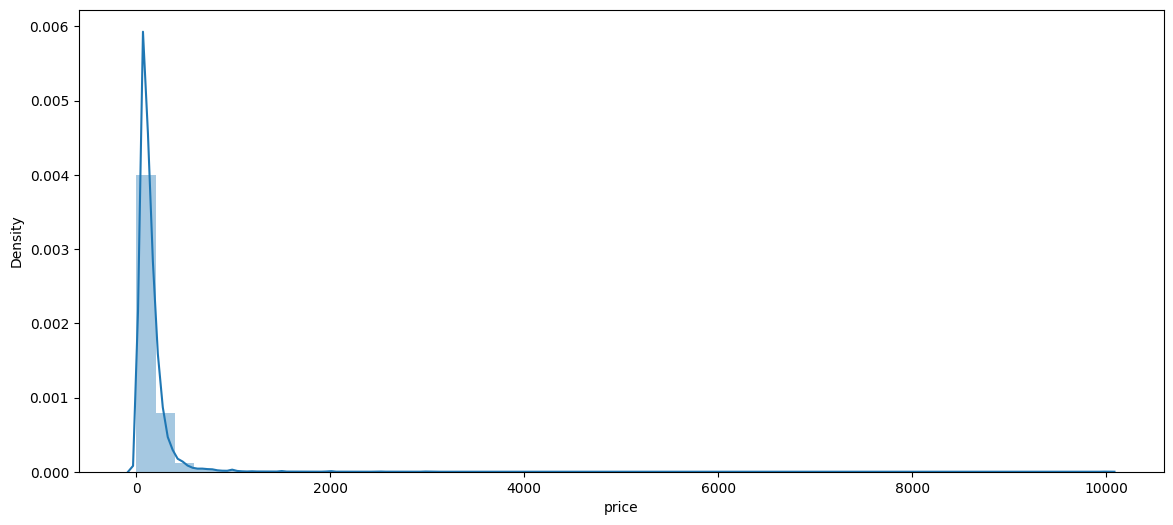

In [ ]:
sns_plot = sns.distplot(df['price'])
plt.show()

In [ ]:
print(f"Average of price per night : ${df.price.mean():.2f}")
print(f"Maximum price per night : ${df.price.max()}")
print(f"Minimum price per night : ${df.price.min()}")

Average of price per night : $152.72
Maximum price per night : $10000
Minimum price per night : $0


It is seen that the price variable has a right skewed distribution. In addition, price values are distributed around 150 on average.

In [ ]:
# There are some free houses
df[df.price == 0].head()

name    host_id  \
23161  Huge Brooklyn Brownstone Living, Close to it all.    8993084   
25433      ★Hostel Style Room | Ideal Traveling Buddies★  131697576   
25634    MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)   15787004   
25753                    Sunny, Quiet Room in Greenpoint    1641537   
25778      Modern apartment in the heart of Williamsburg   10132166   

      neighbourhood_group       neighbourhood  latitude  longitude  \
23161            Brooklyn  Bedford-Stuyvesant  40.69023  -73.95428   
25433               Bronx     East Morrisania  40.83296  -73.88668   
25634            Brooklyn            Bushwick  40.69467  -73.92433   
25753            Brooklyn          Greenpoint  40.72462  -73.94072   
25778            Brooklyn        Williamsburg  40.70838  -73.94645   

             room_type  price  minimum_nights  number_of_reviews  \
23161     Private room      0               4                  1   
25433     Private room      0               2                 55   
25634     Private room      0               2                 16   
25753     Private room      0               2                 12   
25778  Entire home/apt      0               5                  3   

       reviews_per_month  calculated_host_listings_count  availability_365  
23161               0.05                               4                28  
25433               2.56                               4               127  
25634               0.71                               5                 0  
25753               0.53                               2                 0  
25778               0.15                               1                73

## availability_365

In [ ]:
df['availability_365'].nunique()

366

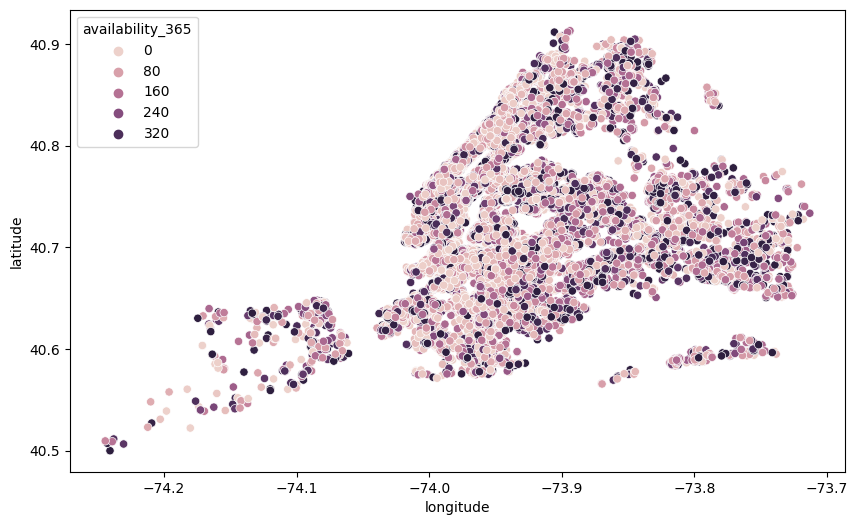

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df.longitude, y=df.latitude,hue=df.availability_365)
plt.show()

### The relationship between price and neihgbourhood_group

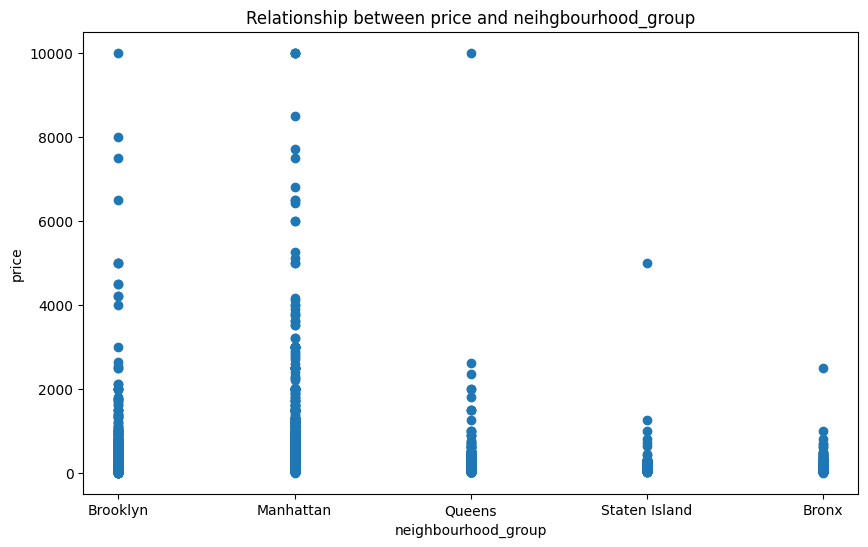

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df['neighbourhood_group'], df['price'])
plt.xlabel('neighbourhood_group')
plt.ylabel('price')
plt.title('Relationship between price and neihgbourhood_group')
plt.show()

Airbnb prices in manhattan and Brooklyn are observed to be higher than in other neighbourhodd groups

### The relationship between price and room type

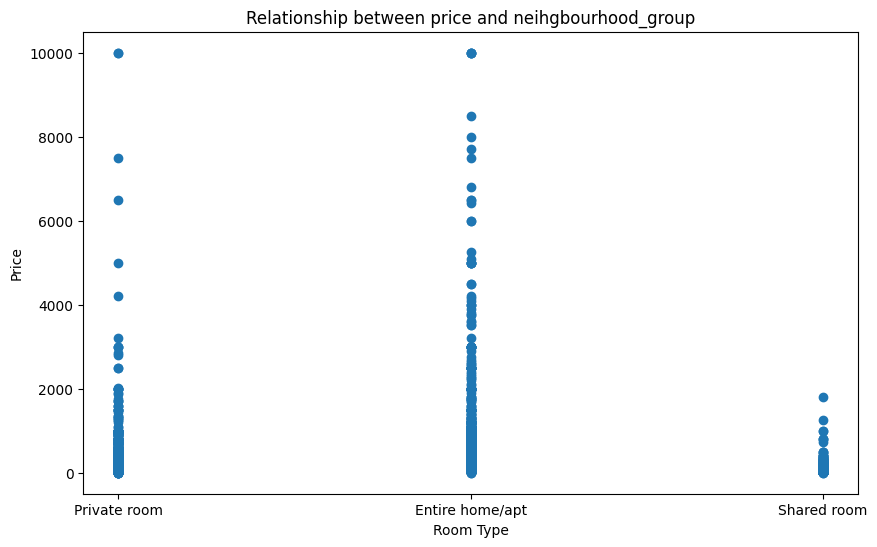

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df['room_type'], df['price'])
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.title('Relationship between price and neihgbourhood_group')
plt.show()

When airbnb prices are compared in terms of room type, the price distribution of the entire home type is the highest, while the price distribution of the shared room type is the lowest.  

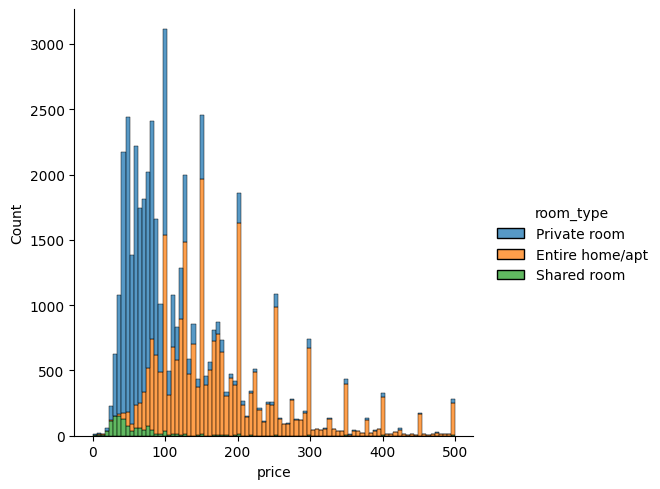

In [ ]:
filtered_df = df[(df["price"] >= 0) & (df["price"] <= 500)]
sns.displot(data=filtered_df, x="price", hue="room_type", multiple="stack")
plt.show()

### The relationship between price and availability

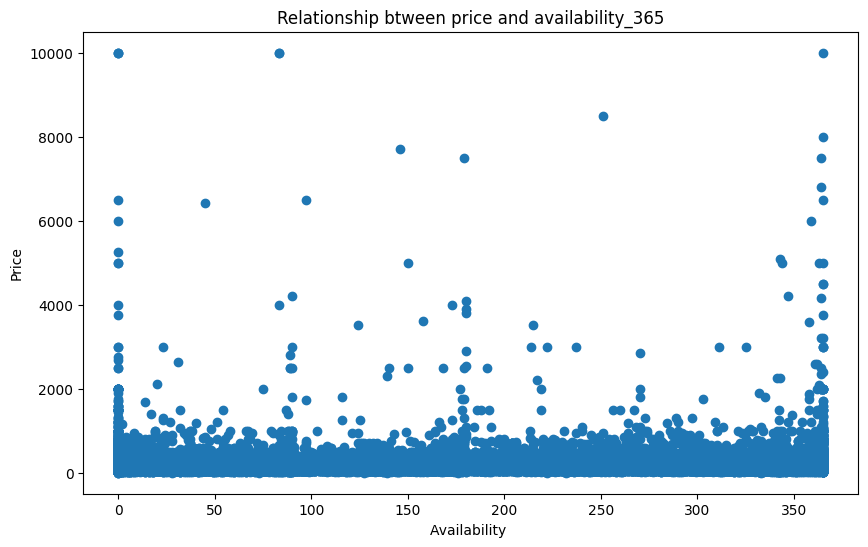

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df['availability_365'], df['price'])
plt.xlabel('Availability ')
plt.ylabel('Price')
plt.title('Relationship btween price and availability_365')
plt.show()

In [ ]:
df.head()

name  host_id  \
0                Clean & quiet apt home by the park     2787   
1                             Skylit Midtown Castle     2845   
2               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3                   Cozy Entire Floor of Brownstone     4869   
4  Entire Apt: Spacious Studio/Loft by central park     7192   

  neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   
2           Manhattan        Harlem  40.80902  -73.94190     Private room   
3            Brooklyn  Clinton Hill  40.68514  -73.95976  Entire home/apt   
4           Manhattan   East Harlem  40.79851  -73.94399  Entire home/apt   

   price  minimum_nights  number_of_reviews  reviews_per_month  \
0    149               1                  9               0.21   
1    225               1                 45               0.38   
2    150               3                  0                NaN   
3     89               1                270               4.64   
4     80              10                  9               0.10   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355  
2                               1               365  
3                               1               194  
4                               1                 0

### WordCloud

The most common words in column neighbourhood

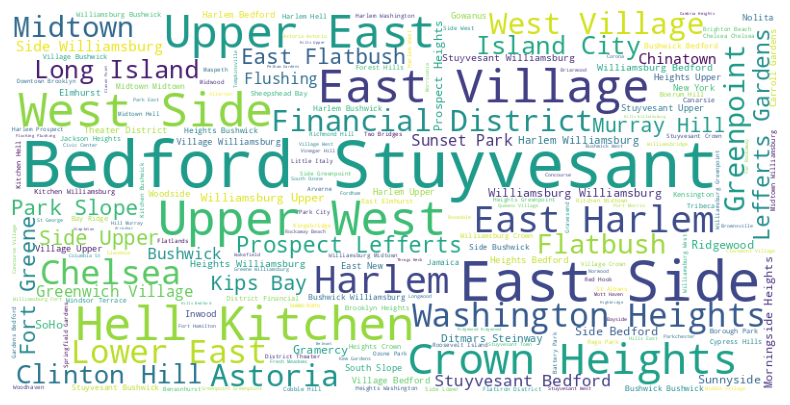

In [ ]:
plt.figure(figsize=(10, 5))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbourhood.png')
plt.show()

Most common words in airbnb apartment descriptions in the name column

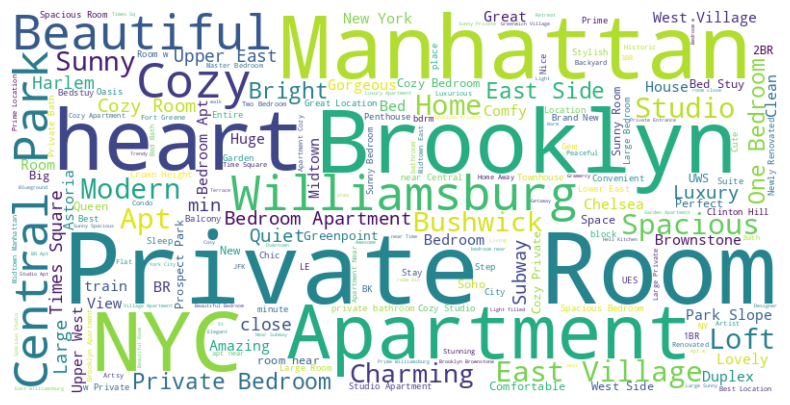

In [ ]:
df['name'] = df['name'].astype(str)  
df = df.dropna(subset=['name']) 
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(" ".join(df['name']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Train-Test Split

In [ ]:
X = df.drop(columns=['name','host_id', 'price'], axis=1)  # independent variables 
y = df['price'] # target variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1773)  # split 20:80 

In [ ]:
print(" Size of train data", X_train.shape)
print(" Size of train data", y_train.shape)
print(" Size of test data", X_test.shape)
print(" Size of test data", y_test.shape)

 Size of train data (39116, 10)
 Size of train data (39116,)
 Size of test data (9779, 10)
 Size of test data (9779,)


Function that returns categorical and numeric features in the data set

In [ ]:
numeric_cols = []
categorical_cols = []
for column in X_train.columns:
    if X_train[column].dtype in ['int64', 'float64']:
        numeric_cols.append(column)
    else:
        categorical_cols.append(column)
print("Numeric columns:")
print(numeric_cols)
print("\nCategoric columns:")
print(categorical_cols)

Numeric columns:
['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

Categoric columns:
['neighbourhood_group', 'neighbourhood', 'room_type']


 Correlation of numeric features.

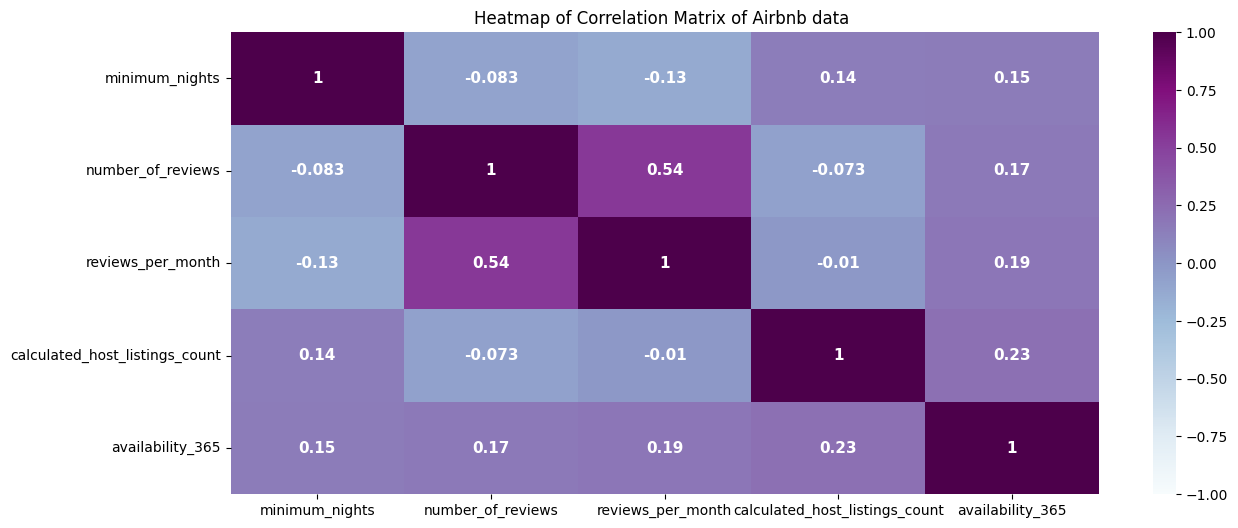

In [ ]:
corr_matrix = X_train[numeric_cols[2:]].corr().round(4)
plt.rcParams['figure.figsize'] = [14, 6] 
sns.heatmap(corr_matrix, cmap='BuPu', vmin=-1, vmax=1, annot=True, annot_kws={'fontsize':11, 'fontweight':'bold'})
plt.title('Heatmap of Correlation Matrix of Airbnb data ')
plt.show()

When looking at the correlation of the data, it is seen that there is no situation that may cause multicollinearity. 